# Introduction
### In this project, we worked with several datasets and performed the following preprocessing steps to prepare the data for analysis:
### Data Integration:
The tables were merged using common keys to create a unified dataset. 
### Handling Missing Values:
Missing values were replaced with the placeholder "missing." As the proportion of missing data was minimal, this approach retained the integrity of the dataset without significant loss of information.
### Top Manufacturers Selection:
To focus on manufacturers with sufficient data points, we identified and selected the top 5 manufacturers with the highest number of entries in the dataset. 

In [ ]:
import pandas as pd
hh_demographic = pd.read_csv(r"C:\Users\User\Desktop\fall courses\MGMT687 AI FOR BUSINESS DECISIONS\final project\original\hh_demographic.csv")
campaign_table = pd.read_csv(r"C:\Users\User\Desktop\fall courses\MGMT687 AI FOR BUSINESS DECISIONS\final project\original\campaign_table.csv")
transaction_data = pd.read_csv(r"C:\Users\User\Desktop\fall courses\MGMT687 AI FOR BUSINESS DECISIONS\final project\revise\transaction_data.csv")

## First, we analyzed the sales trends for the selected manufacturers across different time periods.

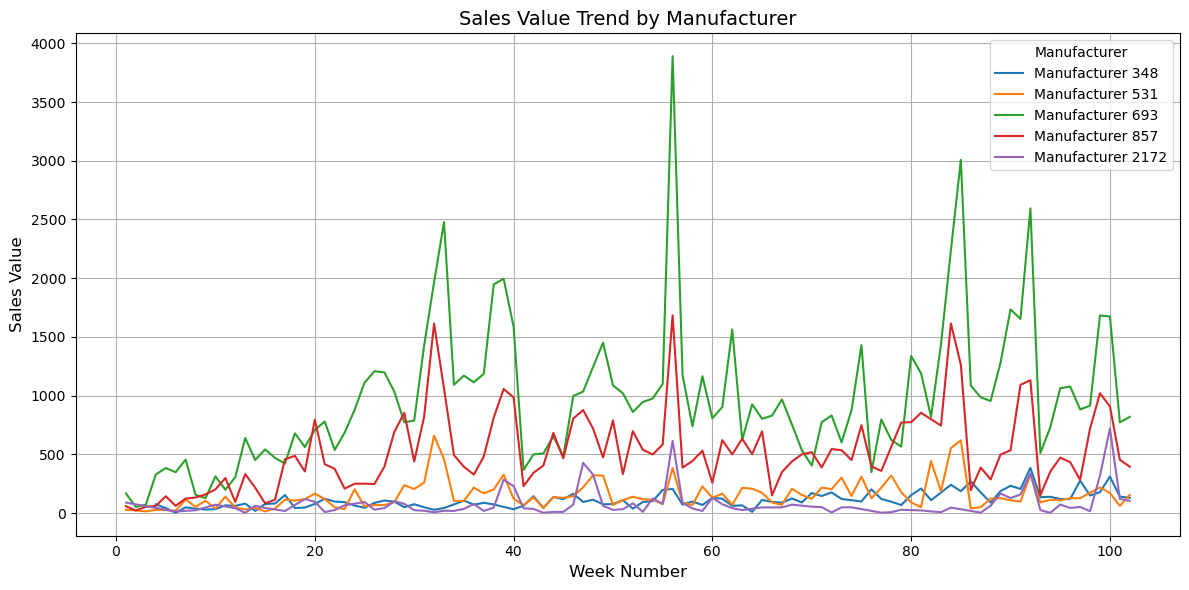

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# load the merged data
demograhpic_combined = pd.read_csv(r"C:\Users\User\Desktop\fall courses\MGMT687 AI FOR BUSINESS DECISIONS\final project\merge\demograhpic_combined.csv")

# Group by MANUFACTURER and WEEK_NO and aggregate sales values
if 'SALES_VALUE' in demograhpic_combined.columns and 'WEEK_NO' in demograhpic_combined.columns and 'MANUFACTURER' in demograhpic_combined.columns:
    grouped_data = demograhpic_combined.groupby(['MANUFACTURER', 'WEEK_NO'])['SALES_VALUE'].sum().reset_index()

    # Generate the trend chart
    plt.figure(figsize=(12, 6))

    # Plot the trend line for each MANUFACTURER
    for manufacturer in grouped_data['MANUFACTURER'].unique():
        manufacturer_data = grouped_data[grouped_data['MANUFACTURER'] == manufacturer]
        plt.plot(manufacturer_data['WEEK_NO'], manufacturer_data['SALES_VALUE'], label=f"Manufacturer {manufacturer}")

    # Add chart title and labels
    plt.title("Sales Value Trend by Manufacturer", fontsize=14)
    plt.xlabel("Week Number", fontsize=12)
    plt.ylabel("Sales Value", fontsize=12)
    plt.legend(title="Manufacturer")
    plt.grid(True)
    plt.tight_layout()

    # Display the chart
    plt.show()



### From the plot above, we can see that Manufacturers 693 and 857 have the highest sales values

## Next, we want to know if the coupon issued by manufacturers aligned with sales trend.
Our goal is to investigate whether the coupons issued by manufacturers align with their sales trends. Specifically, we expect to observe a positive relationship, where an increase in the number of coupons issued corresponds to a rise in sales values.

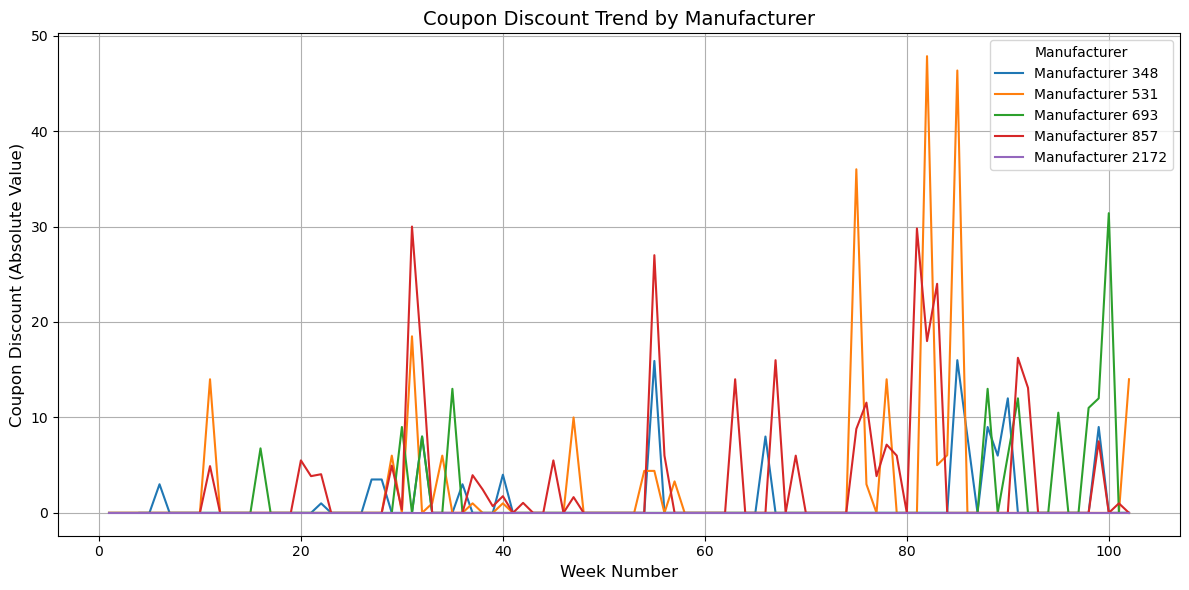

In [32]:
import pandas as pd
import matplotlib.pyplot as plt


if 'COUPON_DISC' in demograhpic_combined.columns and 'WEEK_NO' in demograhpic_combined.columns and 'MANUFACTURER' in demograhpic_combined.columns:
    # Convert COUPON_DISC to absolute values
    demograhpic_combined['COUPON_DISC'] = demograhpic_combined['COUPON_DISC'].abs()

    # Group by MANUFACTURER and WEEK_NO and aggregate COUPON_DISC
    grouped_data = demograhpic_combined.groupby(['MANUFACTURER', 'WEEK_NO'])['COUPON_DISC'].sum().reset_index()

    # Generate the trend chart
    plt.figure(figsize=(12, 6))

    # Plot the trend line for each MANUFACTURER
    for manufacturer in grouped_data['MANUFACTURER'].unique():
        manufacturer_data = grouped_data[grouped_data['MANUFACTURER'] == manufacturer]
        plt.plot(manufacturer_data['WEEK_NO'], manufacturer_data['COUPON_DISC'], label=f"Manufacturer {manufacturer}")

    # Add chart title and labels
    plt.title("Coupon Discount Trend by Manufacturer", fontsize=14)
    plt.xlabel("Week Number", fontsize=12)
    plt.ylabel("Coupon Discount (Absolute Value)", fontsize=12)
    plt.legend(title="Manufacturer")
    plt.grid(True)
    plt.tight_layout()

    # Display the chart
    plt.show()



### We observed that the two manufacturers with the largest sales values also issued the most coupons.

## For further analysis, we chose Manufacturer 857 as our focal brand and Manufacturer 693 as their main competitor. 
The goal is to identify key product differences and develop strategies to better customize and target customers effectively.

   PRODUCT_ID  MANUFACTURER     COMMODITY_DESC              SUB_COMMODITY_DESC
0       30937           693   CANDY - PACKAGED         CANDY BARS (MULTI PACK)
1       31159           693  CANDY - CHECKLANE  CANDY BARS (SINGLES)(INCLUDING
2       31161           693  CANDY - CHECKLANE  CANDY BARS (SINGLES)(INCLUDING
3       31412           693  CANDY - CHECKLANE  CANDY BARS (SINGLES)(INCLUDING
4       32265           693  CANDY - CHECKLANE  CANDY BARS (SINGLES)(INCLUDING


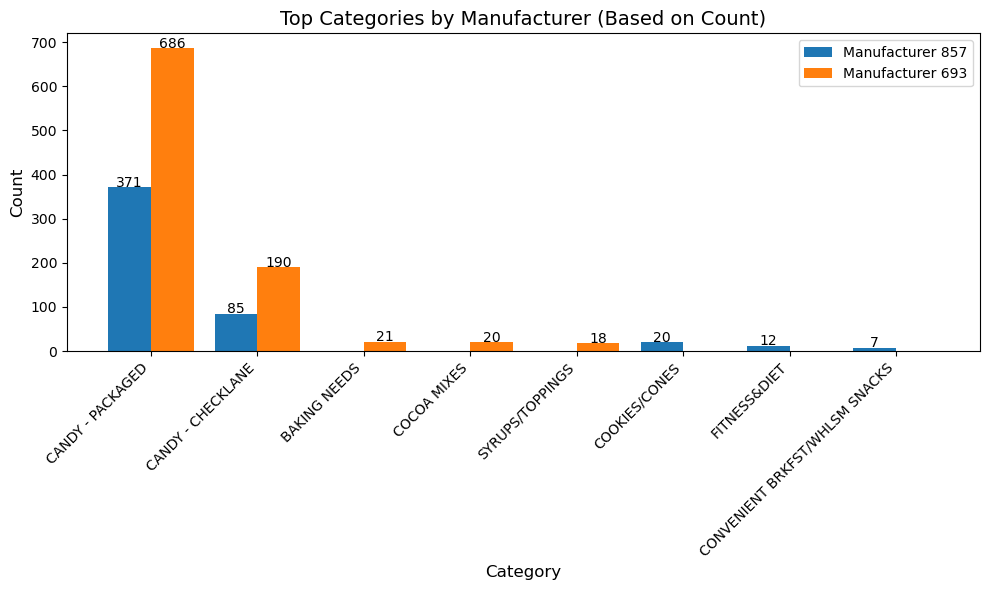

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"C:\Users\User\Desktop\fall courses\MGMT687 AI FOR BUSINESS DECISIONS\final project\revise\product_857 and 693 only_v.csv"
data = pd.read_csv(file_path)

print(data.head())

manufacturer_column = 'MANUFACTURER'  
product_id_column = 'PRODUCT_ID'      
category_column = 'COMMODITY_DESC'          

# Filter data for manufacturers
manufacturers = [857, 693]  
filtered_data = data[data[manufacturer_column].isin(manufacturers)]

# Count the number of entries for each category for each manufacturer
top_categories = (
    filtered_data.groupby([manufacturer_column, category_column])
    .size()
    .reset_index(name='category_count')
    .sort_values(by=[manufacturer_column, 'category_count'], ascending=[True, False])
    .groupby(manufacturer_column)
    .head(5)
)

# Create x-axis labels
categories = top_categories[category_column].unique()
x = np.arange(len(categories))  

width = 0.4  
counts_857 = [
    top_categories[(top_categories[manufacturer_column] == 857) & (top_categories[category_column] == category)]['category_count'].sum()
    for category in categories
]
counts_693 = [
    top_categories[(top_categories[manufacturer_column] == 693) & (top_categories[category_column] == category)]['category_count'].sum()
    for category in categories
]

# Plot bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width / 2, counts_857, width, label="Manufacturer 857")
ax.bar(x + width / 2, counts_693, width, label="Manufacturer 693")

for i in range(len(categories)):
    if counts_857[i] > 0:
        ax.text(x[i] - width / 2, counts_857[i] + 1, str(counts_857[i]), ha='center', fontsize=10)
    if counts_693[i] > 0:
        ax.text(x[i] + width / 2, counts_693[i] + 1, str(counts_693[i]), ha='center', fontsize=10)

ax.set_title("Top Categories by Manufacturer (Based on Count)", fontsize=14)
ax.set_xlabel("Category", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_15852\1005546663.py:6: DtypeWarning: Columns (6,7,11,19) have mixed types. Specify dtype option on import or set low_memory=False.
  whole_data = pd.read_csv(r"C:\Users\User\Desktop\fall courses\MGMT687 AI FOR BUSINESS DECISIONS\final project\revise\whole_clean.csv")


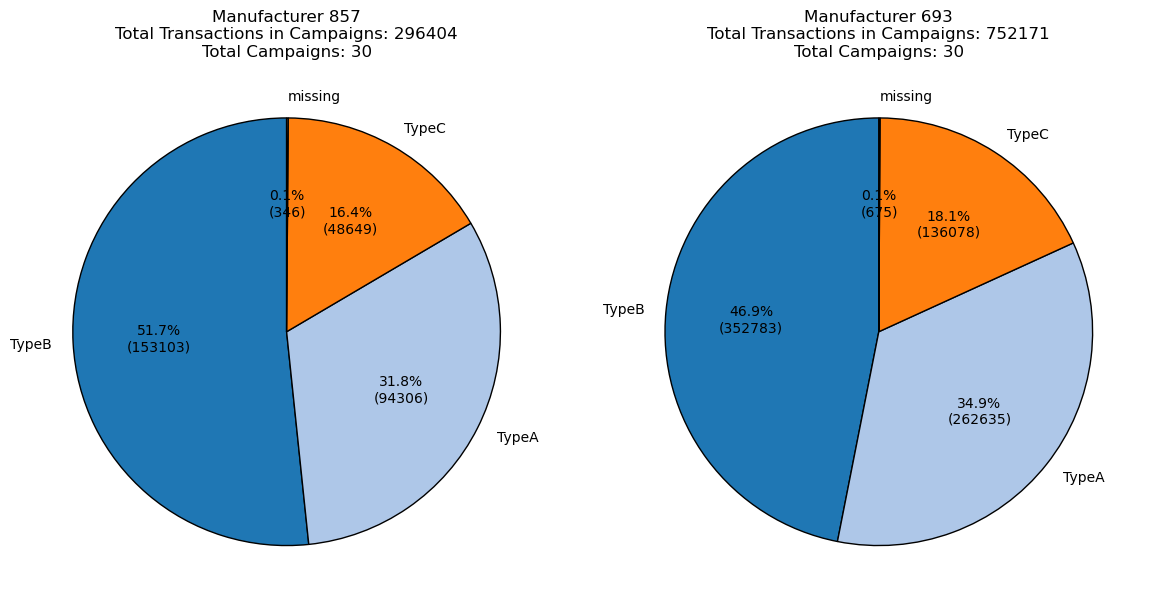

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `whole_data` is a DataFrame containing the dataset
# Example:
whole_data = pd.read_csv(r"C:\Users\User\Desktop\fall courses\MGMT687 AI FOR BUSINESS DECISIONS\final project\revise\whole_clean.csv")

# Filter data for Manufacturer 857 and 693
data_857 = whole_data[whole_data['MANUFACTURER'] == 857]
data_693 = whole_data[whole_data['MANUFACTURER'] == 693]

# Calculate the campaign type proportions for both manufacturers
campaign_857 = data_857['DESCRIPTION'].value_counts()
campaign_693 = data_693['DESCRIPTION'].value_counts()

# Function to create a pie chart
def plot_pie(data, manufacturer_id, ax):
    data.plot.pie(
        autopct=lambda p: f'{p:.1f}%\n({int(round(p*data.sum()/100))})',
        startangle=90,
        ax=ax,
        labels=data.index,
        colors=plt.cm.tab20.colors,
        wedgeprops=dict(edgecolor='black'),
        textprops=dict(color='black')
    )
    ax.set_title(f'Manufacturer {manufacturer_id}\nTotal Transactions in Campaigns: {data.sum()}\nTotal Campaigns: 30', fontsize=12)
    ax.set_ylabel('')

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

plot_pie(campaign_857, 857, axes[0])
plot_pie(campaign_693, 693, axes[1])

plt.tight_layout()
plt.show()


## Catboost modeling to predict sales values.
Next, we chose CatBoost modeling to predict sales using both numerical and categorical features, followed by a feature importance analysis. CatBoost is particularly efficient at handling categorical features directly, eliminating the need for extensive preprocessing like one-hot encoding.

In [51]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Read the data
data = pd.read_csv(r"C:\Users\User\Desktop\fall courses\MGMT687 AI FOR BUSINESS DECISIONS\final project\revise\whole_clean.csv")

# Filter the target manufacturer 
data_857 = data[data['MANUFACTURER'] == 857]

# Define features and target variable
numerical_features = ['QUANTITY', 'COUPON_DISC', 'COUPON_MATCH_DISC', 'RETAIL_DISC']
categorical_features = ['COMMODITY_DESC', 'SUB_COMMODITY_DESC', 'classification_1', 'classification_2',
                        'classification_3', 'classification_4', 'classification_5', 'HOMEOWNER_DESC', 
                        'KID_CATEGORY_DESC', 'CAMPAIGN', 'DESCRIPTION']

# Fill missing values for categorical features with "missing" and ensure they are strings
data_857[categorical_features] = data_857[categorical_features].fillna('missing').astype(str)

# Fill missing values for numerical features with 0 and ensure they are numeric
for col in numerical_features:
    data_857[col] = pd.to_numeric(data_857[col], errors='coerce').fillna(0)

# Extract features (X) and target variable (y)
X = data_857[numerical_features + categorical_features]
y = data_857['SALES_VALUE']

# Split the data into training and testing sets
X_train, X_test_857, y_train, y_test_857 = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CatBoost model
model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    loss_function='RMSE',
    random_seed=42,
    verbose=100
)

# Train the model
model.fit(
    Pool(X_train, y_train, cat_features=categorical_features),
    eval_set=(X_test_857, y_test_857),
    early_stopping_rounds=50
)

# Predict sales for the test set
y_pred_857 = model.predict(X_test_857)




C:\Users\User\AppData\Local\Temp\ipykernel_6556\3795480249.py:8: DtypeWarning: Columns (6,7,11,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\User\Desktop\fall courses\MGMT687 AI FOR BUSINESS DECISIONS\final project\revise\whole_clean.csv")
C:\Users\User\AppData\Local\Temp\ipykernel_6556\3795480249.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_857[categorical_features] = data_857[categorical_features].fillna('missing').astype(str)
C:\Users\User\AppData\Local\Temp\ipykernel_6556\3795480249.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

0:	learn: 1.7046119	test: 1.7041541	best: 1.7041541 (0)	total: 432ms	remaining: 3m 35s
100:	learn: 0.5495915	test: 0.5441361	best: 0.5441361 (100)	total: 35.3s	remaining: 2m 19s
200:	learn: 0.5481185	test: 0.5433478	best: 0.5433478 (200)	total: 1m 10s	remaining: 1m 44s
300:	learn: 0.5472953	test: 0.5429354	best: 0.5429354 (300)	total: 1m 46s	remaining: 1m 10s
400:	learn: 0.5467029	test: 0.5427944	best: 0.5427944 (400)	total: 2m 22s	remaining: 35.3s
499:	learn: 0.5462008	test: 0.5426524	best: 0.5426512 (497)	total: 3m	remaining: 0us

bestTest = 0.542651182
bestIteration = 497

Shrink model to first 498 iterations.


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test RMSE: 0.5426512215066385
R-squared: 0.9155198664551683

Feature Importance:
            Feature Id  Importances
0          RETAIL_DISC    26.887079
1       COMMODITY_DESC    16.637050
2   SUB_COMMODITY_DESC    13.801114
3    COUPON_MATCH_DISC    13.479788
4     classification_2    11.981076
5             QUANTITY    11.037254
6     classification_1     3.793267
7     classification_4     1.468387
8          COUPON_DISC     0.532336
9     classification_3     0.114797
10   KID_CATEGORY_DESC     0.105776
11    classification_5     0.058629
12      HOMEOWNER_DESC     0.038981
13         DESCRIPTION     0.034863
14            CAMPAIGN     0.029604


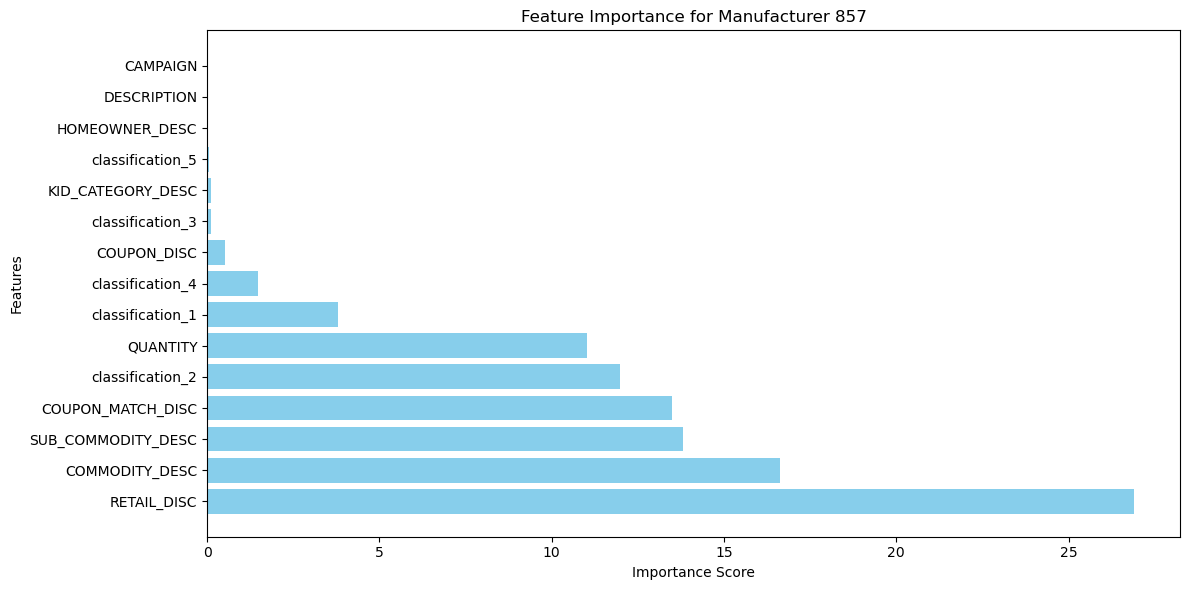

In [9]:
# Model Performance Evaluation
rmse = mean_squared_error(y_test_857, y_pred_857, squared=False)
r2 = r2_score(y_test_857, y_pred_857)

print(f"Test RMSE: {rmse}")
print(f"R-squared: {r2}")

# Feature Importance Analysis
feature_importances = model.get_feature_importance(prettified=True)
print("\nFeature Importance:")
print(feature_importances)

# Visualize Feature Importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(feature_importances['Feature Id'], feature_importances['Importances'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Manufacturer 857')
plt.tight_layout()
plt.show()

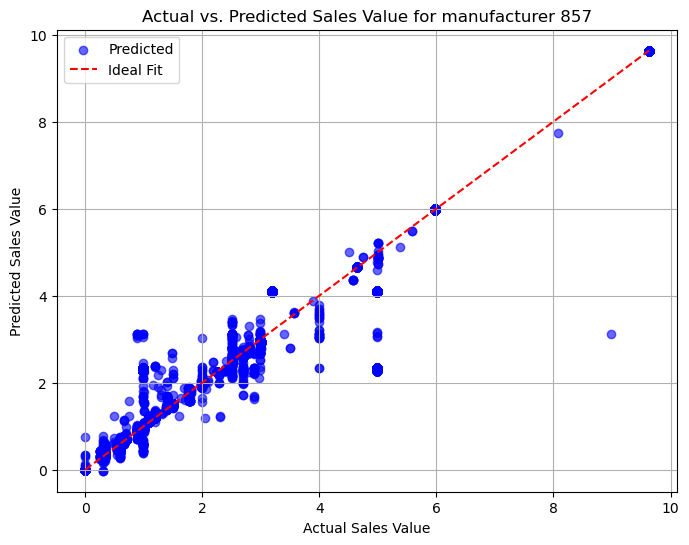

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Create Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_857, y_pred_857, color="blue", alpha=0.6, label="Predicted")
plt.plot([y_test_857.min(), y_test_857.max()], 
         [y_test_857.min(), y_test_857.max()], 
         color="red", linestyle="--", label="Ideal Fit")
plt.title("Actual vs. Predicted Sales Value for manufacturer 857")
plt.xlabel("Actual Sales Value")
plt.ylabel("Predicted Sales Value")
plt.legend()
plt.grid()
plt.show()

In [57]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Read the data
data = pd.read_csv(r"C:\Users\User\Desktop\fall courses\MGMT687 AI FOR BUSINESS DECISIONS\final project\revise\whole_clean.csv")

# Filter the target manufacturer
data_693 = data[data['MANUFACTURER'] == 693]

# Define features and target variable
numerical_features = ['QUANTITY', 'COUPON_DISC', 'COUPON_MATCH_DISC', 'RETAIL_DISC']
categorical_features = ['COMMODITY_DESC', 'SUB_COMMODITY_DESC', 'classification_1', 'classification_2',
                        'classification_3', 'classification_4', 'classification_5', 'HOMEOWNER_DESC', 
                        'KID_CATEGORY_DESC', 'CAMPAIGN', 'DESCRIPTION']

# Fill missing values for categorical features with "missing" and ensure they are strings
data_693[categorical_features] = data_693[categorical_features].fillna('missing').astype(str)

# Fill missing values for numerical features with 0 and ensure they are numeric
for col in numerical_features:
    data_693[col] = pd.to_numeric(data_693[col], errors='coerce').fillna(0)

# Extract features (X) and target variable (y)
X = data_693[numerical_features + categorical_features]
y = data_693['SALES_VALUE']

# Split the data into training and testing sets
X_train, X_test_693, y_train, y_test_693 = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CatBoost model
model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    loss_function='RMSE',
    random_seed=42,
    verbose=100
)

# Train the model
model.fit(
    Pool(X_train, y_train, cat_features=categorical_features),
    eval_set=(X_test_693, y_test_693),
    early_stopping_rounds=50
)

# Predict sales for the test set
y_pred_693 = model.predict(X_test_693)




C:\Users\User\AppData\Local\Temp\ipykernel_6556\2624959853.py:8: DtypeWarning: Columns (6,7,11,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\User\Desktop\fall courses\MGMT687 AI FOR BUSINESS DECISIONS\final project\revise\whole_clean.csv")
C:\Users\User\AppData\Local\Temp\ipykernel_6556\2624959853.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_693[categorical_features] = data_693[categorical_features].fillna('missing').astype(str)
C:\Users\User\AppData\Local\Temp\ipykernel_6556\2624959853.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

0:	learn: 0.8823859	test: 0.8789974	best: 0.8789974 (0)	total: 955ms	remaining: 7m 56s
100:	learn: 0.1390618	test: 0.1344788	best: 0.1344788 (100)	total: 1m 19s	remaining: 5m 13s
200:	learn: 0.1245976	test: 0.1228370	best: 0.1228370 (200)	total: 2m 35s	remaining: 3m 51s
300:	learn: 0.1200204	test: 0.1192099	best: 0.1192099 (300)	total: 3m 49s	remaining: 2m 31s
400:	learn: 0.1171096	test: 0.1166470	best: 0.1166470 (400)	total: 5m 8s	remaining: 1m 16s
499:	learn: 0.1151856	test: 0.1150666	best: 0.1150666 (499)	total: 6m 26s	remaining: 0us

bestTest = 0.1150665531
bestIteration = 499



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test RMSE: 0.11506655318246227
R-squared: 0.9856239123162462

Feature Importance:
            Feature Id  Importances
0          RETAIL_DISC    26.887079
1       COMMODITY_DESC    16.637050
2   SUB_COMMODITY_DESC    13.801114
3    COUPON_MATCH_DISC    13.479788
4     classification_2    11.981076
5             QUANTITY    11.037254
6     classification_1     3.793267
7     classification_4     1.468387
8          COUPON_DISC     0.532336
9     classification_3     0.114797
10   KID_CATEGORY_DESC     0.105776
11    classification_5     0.058629
12      HOMEOWNER_DESC     0.038981
13         DESCRIPTION     0.034863
14            CAMPAIGN     0.029604


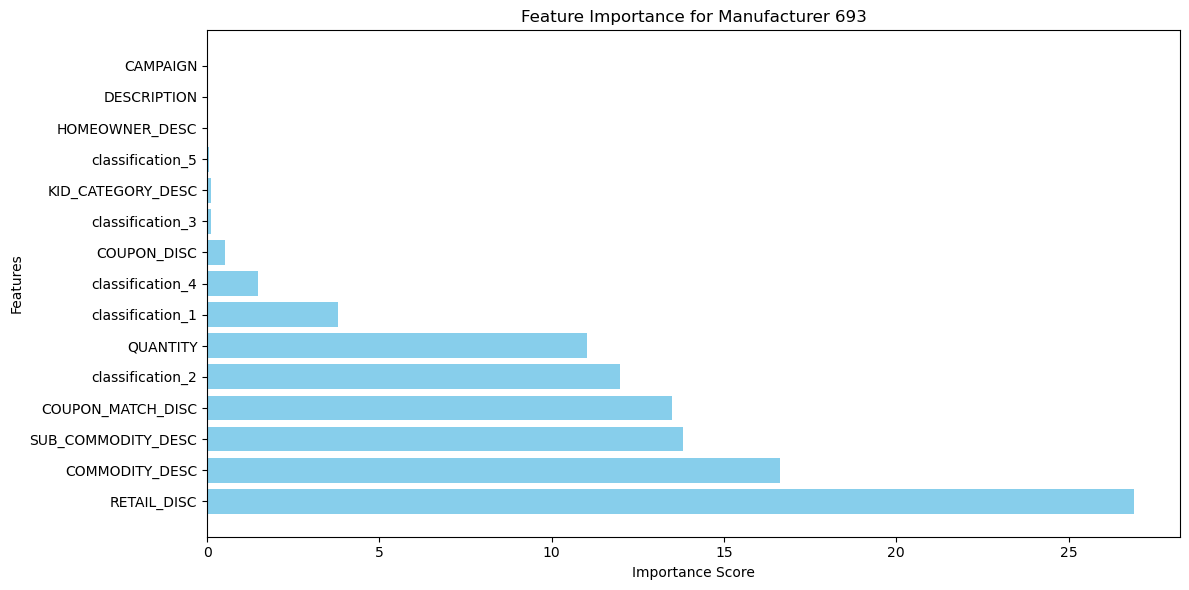

In [53]:
# Model Performance Evaluation
rmse = mean_squared_error(y_test_693, y_pred_693, squared=False)
r2 = r2_score(y_test_693, y_pred_693)

print(f"Test RMSE: {rmse}")
print(f"R-squared: {r2}")

# Feature Importance Analysis
feature_importances = model.get_feature_importance(prettified=True)
print("\nFeature Importance:")
print(feature_importances)

# Visualize Feature Importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(feature_importances['Feature Id'], feature_importances['Importances'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Manufacturer 693')
plt.tight_layout()
plt.show()

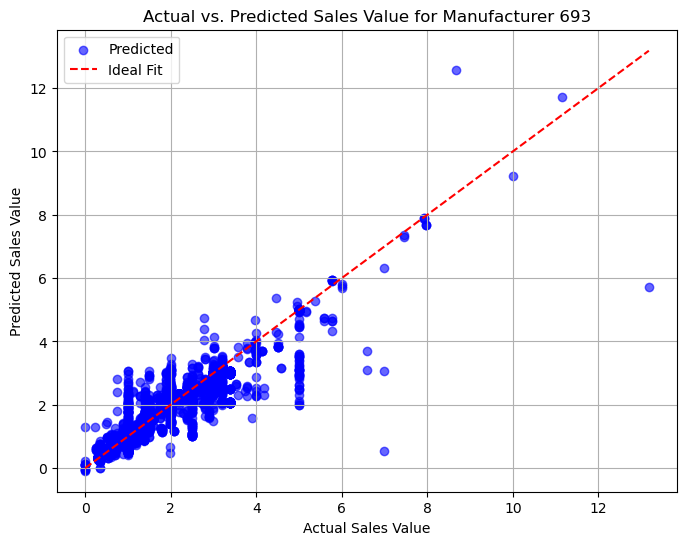

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Create Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_693, y_pred_693, color="blue", alpha=0.6, label="Predicted")
plt.plot([y_test_693.min(), y_test_693.max()], 
         [y_test_693.min(), y_test_693.max()], 
         color="red", linestyle="--", label="Ideal Fit")
plt.title("Actual vs. Predicted Sales Value for Manufacturer 693")
plt.xlabel("Actual Sales Value")
plt.ylabel("Predicted Sales Value")
plt.legend()
plt.grid()
plt.show()

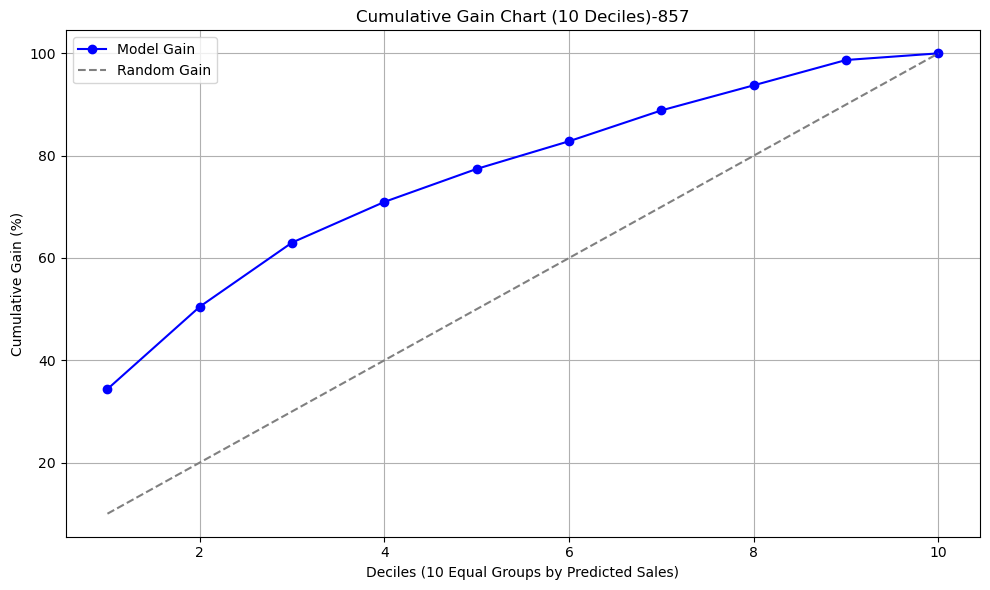

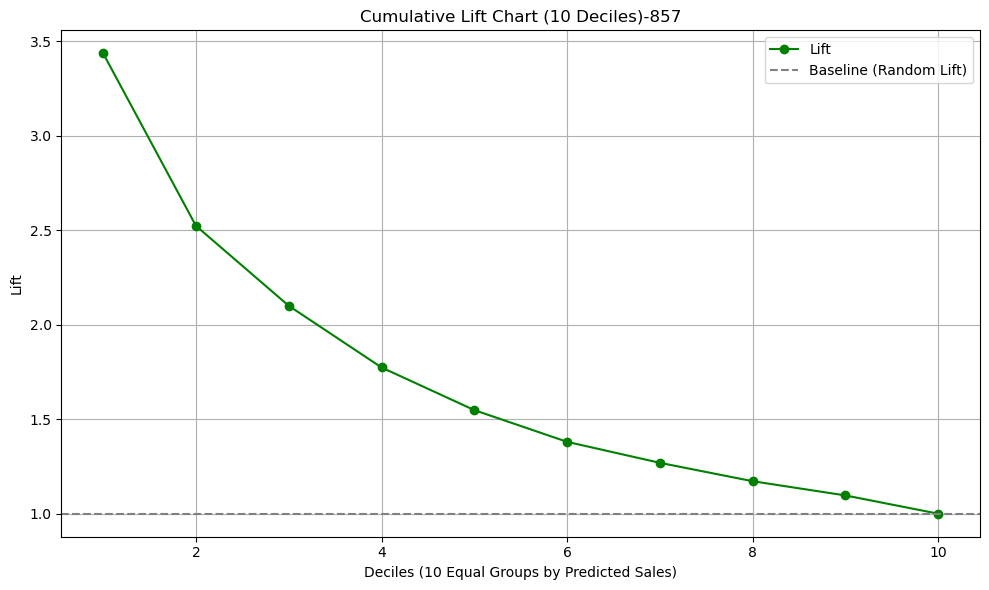

Decile Analysis:
   Decile  Cumulative Actual  Cumulative Gain (%)      Lift
0      10           35657.99            34.365566  3.436557
1       9           52371.20            50.473006  2.523650
2       8           65385.25            63.015362  2.100512
3       7           73631.69            70.962910  1.774073
4       6           80324.45            77.413091  1.548262
5       5           85937.47            82.822667  1.380378
6       4           92192.22            88.850713  1.269296
7       3           97280.45            93.754521  1.171932
8       2          102412.83            98.700878  1.096676
9       1          103760.81           100.000000  1.000000


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a DataFrame containing actual and predicted values
results = pd.DataFrame({'Actual': y_test_857, 'Predicted': y_pred_857})
results['Decile'] = pd.qcut(results['Predicted'], q=10, labels=False) + 1  # 分成10個Deciles，1是最高的預測分組
results_857 = results.merge(data_857[['COMMODITY_DESC', 'SUB_COMMODITY_DESC']], 
                        left_index=True, right_index=True)

# Calculate cumulative sales for each decile
decile_analysis = (
    results_857.groupby('Decile')
    .agg({'Actual': 'sum', 'Predicted': 'sum'})
    .sort_index(ascending=False)  # Higher predicted values appear first
    .reset_index()
)
decile_analysis['Cumulative Actual'] = decile_analysis['Actual'].cumsum()
decile_analysis['Cumulative Predicted'] = decile_analysis['Predicted'].cumsum()

# Calculate cumulative percentages (Gain Chart)
total_actual = results['Actual'].sum()
decile_analysis['Cumulative Gain (%)'] = decile_analysis['Cumulative Actual'] / total_actual * 100
decile_analysis['Random Gain (%)'] = np.linspace(10, 100, 10)  # Baseline for random growth

# Calculate Lift (Lift Chart)
decile_analysis['Lift'] = decile_analysis['Cumulative Gain (%)'] / decile_analysis['Random Gain (%)']

# Plot the Cumulative Gain Chart
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), decile_analysis['Cumulative Gain (%)'], label='Model Gain', marker='o', color='blue')
plt.plot(range(1, 11), decile_analysis['Random Gain (%)'], label='Random Gain', linestyle='--', color='gray')
plt.xlabel('Deciles (10 Equal Groups by Predicted Sales)')
plt.ylabel('Cumulative Gain (%)')
plt.title('Cumulative Gain Chart (10 Deciles)-857')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Plot the Cumulative Lift Chart
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), decile_analysis['Lift'], label='Lift', marker='o', color='green')
plt.axhline(y=1, color='gray', linestyle='--', label='Baseline (Random Lift)')
plt.xlabel('Deciles (10 Equal Groups by Predicted Sales)')
plt.ylabel('Lift')
plt.title('Cumulative Lift Chart (10 Deciles)-857')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Output Decile Analysis Results
print("Decile Analysis:")
print(decile_analysis[['Decile', 'Cumulative Actual', 'Cumulative Gain (%)', 'Lift']])


In [51]:
# Retrieve data from the Top 2 Deciles
top_deciles = results_857[results_857['Decile'] <= 2] # Data from the top two deciles

# Summarize Commodity Desc and Sub Commodity Desc
top_commodity_analysis = top_deciles.groupby(['COMMODITY_DESC', 'SUB_COMMODITY_DESC']).agg({
    'Actual': 'sum',  # Calculate the total actual sales
    'Predicted': 'sum',  # Calculate the total predicted sales
    'Decile': 'count'  # Count the number of records
}).rename(columns={'Actual': 'Total Actual Sales', 'Predicted': 'Total Predicted Sales', 'Decile': 'Record Count'})

# Sort the data by Total Actual Sales in descending order
top_commodity_analysis = top_commodity_analysis.sort_values(by='Total Actual Sales', ascending=False)

top_commodity_analysis

Total Actual Sales  \
COMMODITY_DESC    SUB_COMMODITY_DESC                                   
CANDY - PACKAGED  CANDY BARS (MULTI PACK)                    3532.56   
CANDY - CHECKLANE CANDY BARS (SINGLES)(INCLUDING             1928.63   
CANDY - PACKAGED  CANDY BARS (SINGLES)(INCLUDING              987.33   
CANDY - CHECKLANE CHEWING GUM                                  18.28   
                  MINTS CANDY & BREATH (NOT LIF                12.46   
CANDY - PACKAGED  CANDY BAGS-CHOCOCLATE                         1.10   

                                                  Total Predicted Sales  \
COMMODITY_DESC    SUB_COMMODITY_DESC                                      
CANDY - PACKAGED  CANDY BARS (MULTI PACK)                   3533.564506   
CANDY - CHECKLANE CANDY BARS (SINGLES)(INCLUDING            1908.754752   
CANDY - PACKAGED  CANDY BARS (SINGLES)(INCLUDING             991.744836   
CANDY - CHECKLANE CHEWING GUM                                 20.137561   
                  MINTS CANDY & BREATH (NOT LIF               11.128293   
CANDY - PACKAGED  CANDY BAGS-CHOCOCLATE                        0.773002   

                                                  Record Count  
COMMODITY_DESC    SUB_COMMODITY_DESC                            
CANDY - PACKAGED  CANDY BARS (MULTI PACK)                 4018  
CANDY - CHECKLANE CANDY BARS (SINGLES)(INCLUDING          7044  
CANDY - PACKAGED  CANDY BARS (SINGLES)(INCLUDING          1435  
CANDY - CHECKLANE CHEWING GUM                               33  
                  MINTS CANDY & BREATH (NOT LIF             14  
CANDY - PACKAGED  CANDY BAGS-CHOCOCLATE                      2

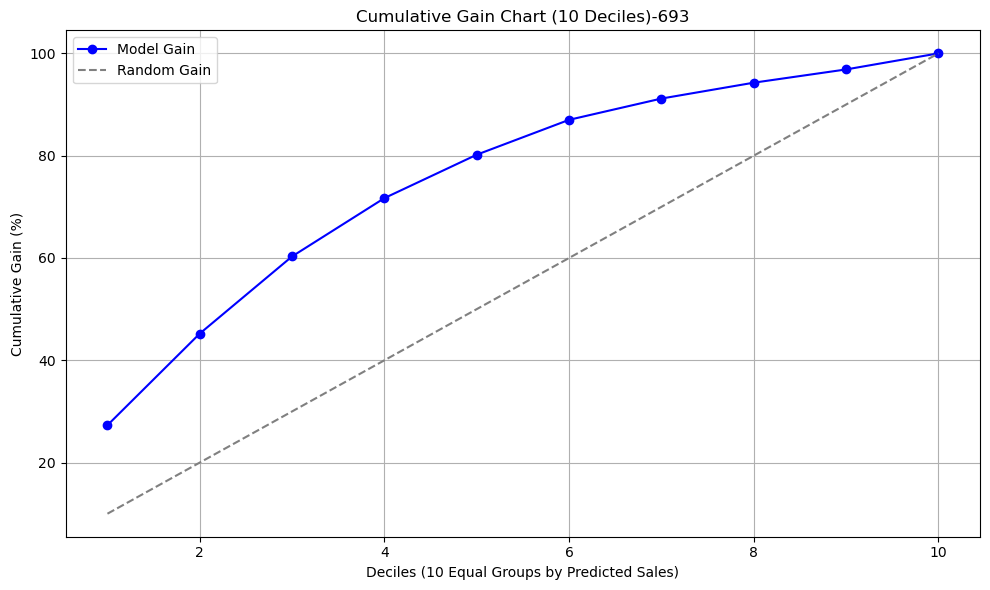

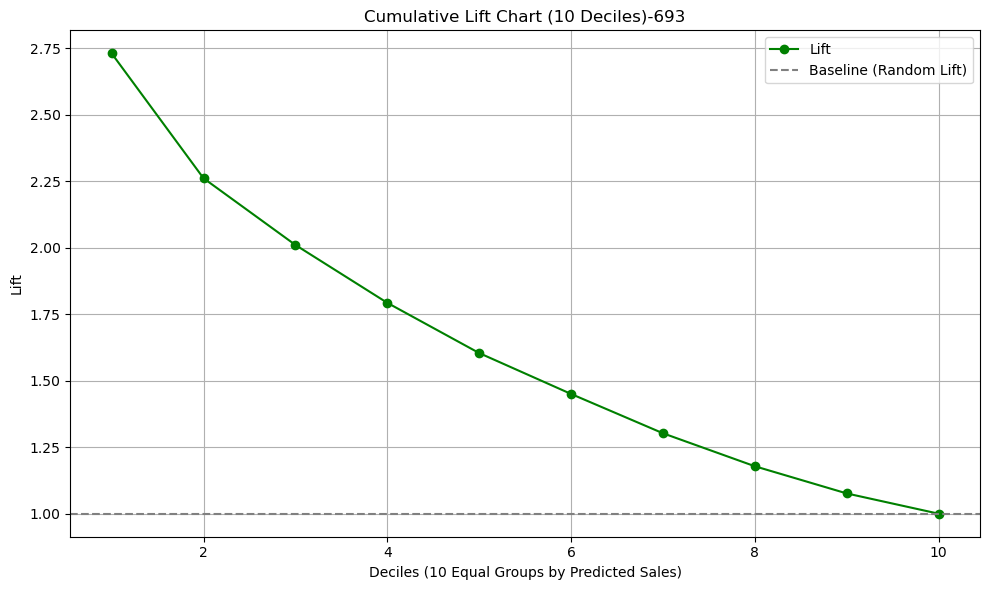

Decile Analysis:
   Decile  Cumulative Actual  Cumulative Gain (%)      Lift
0      10           48105.50            27.303203  2.730320
1       9           79667.38            45.216756  2.260838
2       8          106252.34            60.305562  2.010185
3       7          126333.02            71.702739  1.792568
4       6          141286.10            80.189648  1.603793
5       5          153295.47            87.005797  1.450097
6       4          160619.69            91.162799  1.302326
7       3          166087.54            94.266183  1.178327
8       2          170650.09            96.855746  1.076175
9       1          176189.95           100.000000  1.000000


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a DataFrame containing actual and predicted values
results_693 = pd.DataFrame({'Actual': y_test_693, 'Predicted': y_pred_693})
results_693['Decile'] = pd.qcut(results_693['Predicted'], q=10, labels=False) + 1  # 分成10個Deciles，1是最高的預測分組
results_693 = results_693.merge(data_693[['COMMODITY_DESC', 'SUB_COMMODITY_DESC']], 
                        left_index=True, right_index=True)

# Calculate cumulative sales for each decile
decile_analysis = (
    results_693.groupby('Decile')
    .agg({'Actual': 'sum', 'Predicted': 'sum'})
    .sort_index(ascending=False)  # Higher predicted values appear first
    .reset_index()
)
decile_analysis['Cumulative Actual'] = decile_analysis['Actual'].cumsum()
decile_analysis['Cumulative Predicted'] = decile_analysis['Predicted'].cumsum()

# Calculate cumulative percentages (Gain Chart)
total_actual = results_693['Actual'].sum()
decile_analysis['Cumulative Gain (%)'] = decile_analysis['Cumulative Actual'] / total_actual * 100
decile_analysis['Random Gain (%)'] = np.linspace(10, 100, 10)  # Baseline for random growth

# Calculate Lift (Lift Chart)
decile_analysis['Lift'] = decile_analysis['Cumulative Gain (%)'] / decile_analysis['Random Gain (%)']

# Plot the Cumulative Gain Chart
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), decile_analysis['Cumulative Gain (%)'], label='Model Gain', marker='o', color='blue')
plt.plot(range(1, 11), decile_analysis['Random Gain (%)'], label='Random Gain', linestyle='--', color='gray')
plt.xlabel('Deciles (10 Equal Groups by Predicted Sales)')
plt.ylabel('Cumulative Gain (%)')
plt.title('Cumulative Gain Chart (10 Deciles)-693')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Plot the Cumulative Lift Chart
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), decile_analysis['Lift'], label='Lift', marker='o', color='green')
plt.axhline(y=1, color='gray', linestyle='--', label='Baseline (Random Lift)')
plt.xlabel('Deciles (10 Equal Groups by Predicted Sales)')
plt.ylabel('Lift')
plt.title('Cumulative Lift Chart (10 Deciles)-693')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Output Decile Analysis Results
print("Decile Analysis:")
print(decile_analysis[['Decile', 'Cumulative Actual', 'Cumulative Gain (%)', 'Lift']])


In [49]:
# Retrieve data from the Top 2 Deciles
top_deciles = results_693[results_693['Decile'] <= 2]  # Data from the top two deciles

# Summarize Commodity Desc and Sub Commodity Desc
top_commodity_analysis = top_deciles.groupby(['COMMODITY_DESC', 'SUB_COMMODITY_DESC']).agg({
    'Actual': 'sum',  # Calculate the total actual sales
    'Predicted': 'sum',  # Calculate the total predicted sales
    'Decile': 'count'  # Count the number of records
}).rename(columns={'Actual': 'Total Actual Sales', 'Predicted': 'Total Predicted Sales', 'Decile': 'Record Count'})

# Sort the data by Total Actual Sales in descending order
top_commodity_analysis = top_commodity_analysis.sort_values(by='Total Actual Sales', ascending=False)

top_commodity_analysis

Total Actual Sales  \
COMMODITY_DESC      SUB_COMMODITY_DESC                                   
CANDY - CHECKLANE   CANDY BARS (SINGLES)(INCLUDING             8702.47   
COOKWARE & BAKEWARE CANDY BARS (SINGLES)(INCLUDING             1395.24   
SPORTS MEMORABLILIA CANDY BARS (SINGLES)(INCLUDING                2.04   
CANDY - CHECKLANE   SEASONAL CANDY BAGS-CHOCOLATE                 1.98   
CANDY - PACKAGED    CANDY BAGS-NON CHOCOLATE                      0.68   
                    CANDY BAGS-CHOCOCLATE                         0.00   
                    CANDY BARS (MULTI PACK)                       0.00   

                                                    Total Predicted Sales  \
COMMODITY_DESC      SUB_COMMODITY_DESC                                      
CANDY - CHECKLANE   CANDY BARS (SINGLES)(INCLUDING            8700.691870   
COOKWARE & BAKEWARE CANDY BARS (SINGLES)(INCLUDING            1404.411868   
SPORTS MEMORABLILIA CANDY BARS (SINGLES)(INCLUDING               1.820194   
CANDY - CHECKLANE   SEASONAL CANDY BAGS-CHOCOLATE                1.892205   
CANDY - PACKAGED    CANDY BAGS-NON CHOCOLATE                    -0.007126   
                    CANDY BAGS-CHOCOCLATE                        0.325279   
                    CANDY BARS (MULTI PACK)                      0.409470   

                                                    Record Count  
COMMODITY_DESC      SUB_COMMODITY_DESC                            
CANDY - CHECKLANE   CANDY BARS (SINGLES)(INCLUDING         26453  
COOKWARE & BAKEWARE CANDY BARS (SINGLES)(INCLUDING          4228  
SPORTS MEMORABLILIA CANDY BARS (SINGLES)(INCLUDING             6  
CANDY - CHECKLANE   SEASONAL CANDY BAGS-CHOCOLATE              6  
CANDY - PACKAGED    CANDY BAGS-NON CHOCOLATE                   2  
                    CANDY BAGS-CHOCOCLATE                      3  
                    CANDY BARS (MULTI PACK)                    5

## Now let's simulate the impact of a 20% increase in retail discounts on the overall sales values.

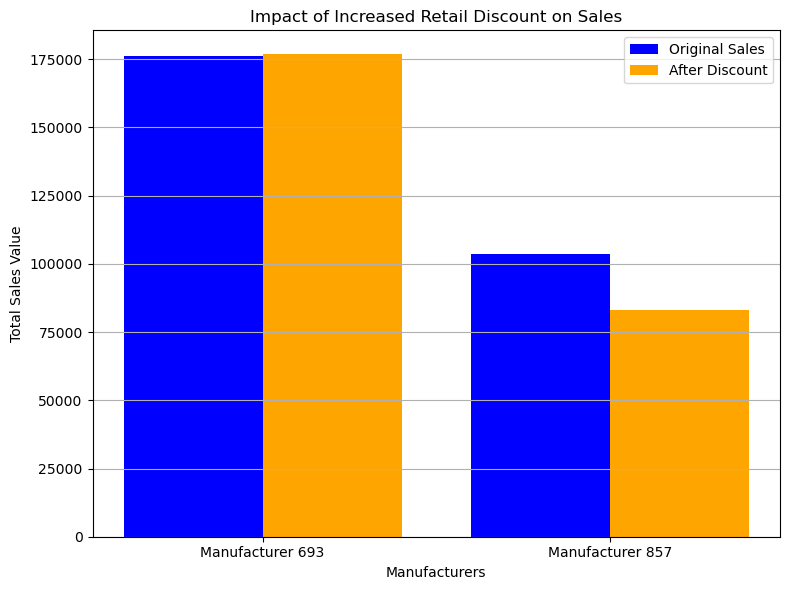

In [59]:
# Simulate increased discounts for Manufacturer 693
# Create a copy to avoid modifying the original test data
X_test_693_modified = X_test_693.copy()

# Increase the value of RETAIL_DISC, e.g., by 20%
X_test_693_modified['RETAIL_DISC'] *= 1.2

# Predict sales after the increased discount
y_pred_693_modified = model.predict(X_test_693_modified)

# Simulate increased discounts for Manufacturer 857
# Create a copy to avoid modifying the original test data
X_test_857_modified = X_test_857.copy()

# Increase the value of RETAIL_DISC, e.g., by 20%
X_test_857_modified['RETAIL_DISC'] *= 1.2

# Predict sales after the increased discount
y_pred_857_modified = model.predict(X_test_857_modified)

# Aggregate total sales for visualization
original_sales = [y_test_693.sum(), y_test_857.sum()]
modified_sales = [y_pred_693_modified.sum(), y_pred_857_modified.sum()]

# Plot bar chart for comparison
manufacturers = ['Manufacturer 693', 'Manufacturer 857']
bar_width = 0.4
x = np.arange(len(manufacturers))

plt.figure(figsize=(8, 6))  # Set figure size
plt.bar(x, original_sales, width=bar_width, label='Original Sales', color='blue')  # Plot original sales
plt.bar(x + bar_width, modified_sales, width=bar_width, label='After Discount', color='orange')  # Plot modified sales

# Add labels, title, and legends
plt.xlabel("Manufacturers")  # X-axis label
plt.ylabel("Total Sales Value")  # Y-axis label
plt.title("Impact of Increased Retail Discount on Sales")  # Chart title
plt.xticks(x + bar_width / 2, manufacturers)  # Align tick labels
plt.legend()  # Add legend
plt.grid(axis='y')  # Add horizontal grid lines
plt.tight_layout()  # Adjust layout to fit elements
plt.show()  # Display chart


## Surprisingly, Manufacturer 857's total sales value declined after applying retail discounts. 
This suggests that the discounts may have been **misaligned with consumer demand** or **improperly targeted at low-performing products**. Additionally, the decline could indicate stronger competitive effects or reduced price elasticity for Manufacturer 857's products. In contrast, Manufacturer 693’s discounts maintained or improved sales, highlighting better alignment with market dynamics.

## Next, we further explore the top commodity and sub_commodity for each munufacturer.

C:\Users\User\AppData\Local\Temp\ipykernel_35420\1136957673.py:5: DtypeWarning: Columns (6,7,11,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\User\Desktop\fall courses\MGMT687 AI FOR BUSINESS DECISIONS\final project\revise\whole_clean.csv")


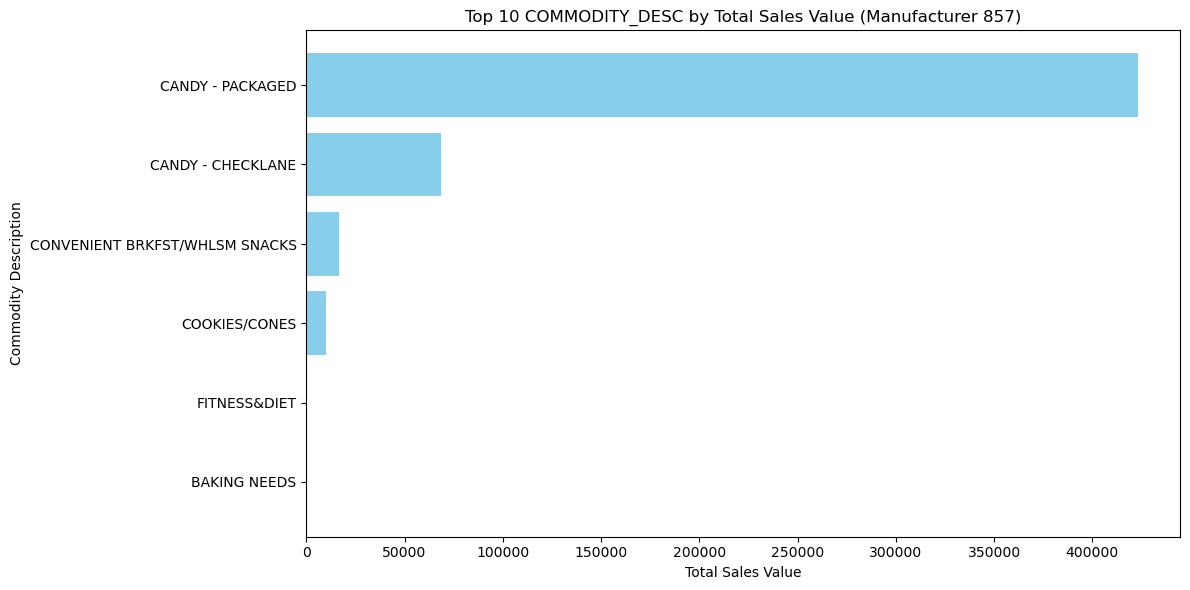

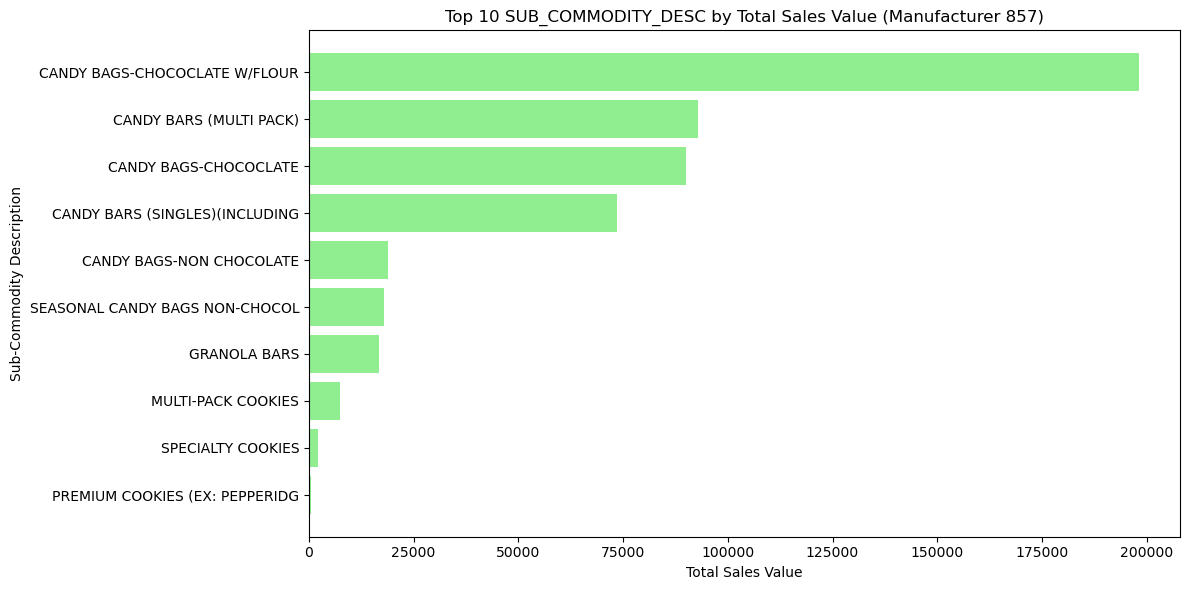

Top 10 COMMODITY_DESC:
                   COMMODITY_DESC      mean        sum   count
0                CANDY - PACKAGED  2.141237  423431.79  197751
1               CANDY - CHECKLANE  0.784288   68697.32   87592
2  CONVENIENT BRKFST/WHLSM SNACKS  2.302609   16647.86    7230
3                   COOKIES/CONES  2.670243   10090.85    3779
4                    FITNESS&DIET  2.207143     108.15      49
5                    BAKING NEEDS  2.690000       8.07       3

Top 10 SUB_COMMODITY_DESC:
               SUB_COMMODITY_DESC      mean        sum  count
0   CANDY BAGS-CHOCOCLATE W/FLOUR  5.843787  198034.26  33888
1         CANDY BARS (MULTI PACK)  0.964817   92956.24  96346
2           CANDY BAGS-CHOCOCLATE  2.519610   90131.48  35772
3  CANDY BARS (SINGLES)(INCLUDING  0.776728   73428.80  94536
4        CANDY BAGS-NON CHOCOLATE  1.531265   18938.69  12368
5  SEASONAL CANDY BAGS NON-CHOCOL  1.500000   17955.00  11970
6                    GRANOLA BARS  2.302609   16647.86   7230
7           

In [208]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the original datasetdata = pd.read_csv(r"C:\Users\User\Desktop\fall courses\MGMT687 AI FOR BUSINESS DECISIONS\final project\revise\whole_clean.csv")

# Filter the target manufacturer (857)
data_857 = data[data['MANUFACTURER'] == 857]

# Group by `COMMODITY_DESC` and calculate average sales, total sales, and count
commodity_analysis = (
    data_857.groupby('COMMODITY_DESC')['SALES_VALUE']
    .agg(['mean', 'sum', 'count'])  # 平均值, 總和, 次數
    .sort_values(by='sum', ascending=False)  # 按總銷量降序排序
    .reset_index()
)

# Group by `SUB_COMMODITY_DESC` and calculate average sales, total sales, and count
sub_commodity_analysis = (
    data_857.groupby('SUB_COMMODITY_DESC')['SALES_VALUE']
    .agg(['mean', 'sum', 'count'])  
    .sort_values(by='sum', ascending=False) 
    .reset_index()
)

# Visualize total sales for `COMMODITY_DESC`
plt.figure(figsize=(12, 6))
plt.barh(commodity_analysis['COMMODITY_DESC'][:10], commodity_analysis['sum'][:10], color='skyblue')
plt.xlabel('Total Sales Value')
plt.ylabel('Commodity Description')
plt.title('Top 10 COMMODITY_DESC by Total Sales Value (Manufacturer 857)')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

# Visualize total sales for `SUB_COMMODITY_DESC`
plt.figure(figsize=(12, 6))
plt.barh(sub_commodity_analysis['SUB_COMMODITY_DESC'][:10], sub_commodity_analysis['sum'][:10], color='lightgreen')
plt.xlabel('Total Sales Value')
plt.ylabel('Sub-Commodity Description')
plt.title('Top 10 SUB_COMMODITY_DESC by Total Sales Value (Manufacturer 857)')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

# Output the top data tables
print("Top 10 COMMODITY_DESC:")
print(commodity_analysis.head(10))

print("\nTop 10 SUB_COMMODITY_DESC:")
print(sub_commodity_analysis.head(10))


C:\Users\User\AppData\Local\Temp\ipykernel_35420\2358501355.py:5: DtypeWarning: Columns (6,7,11,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\User\Desktop\fall courses\MGMT687 AI FOR BUSINESS DECISIONS\final project\revise\whole_clean.csv")


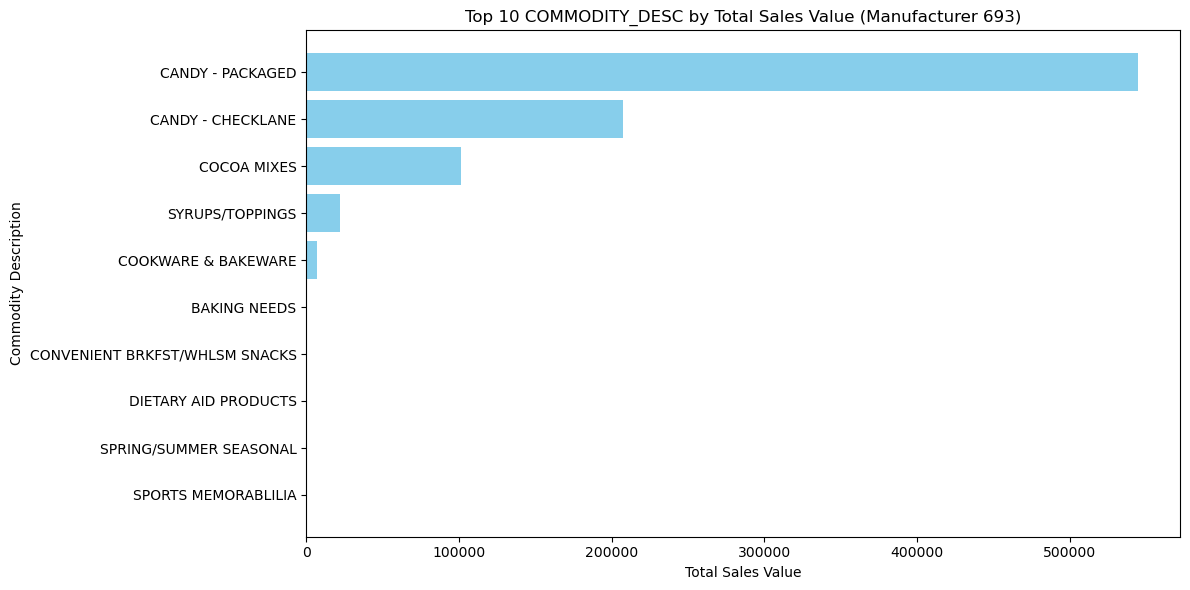

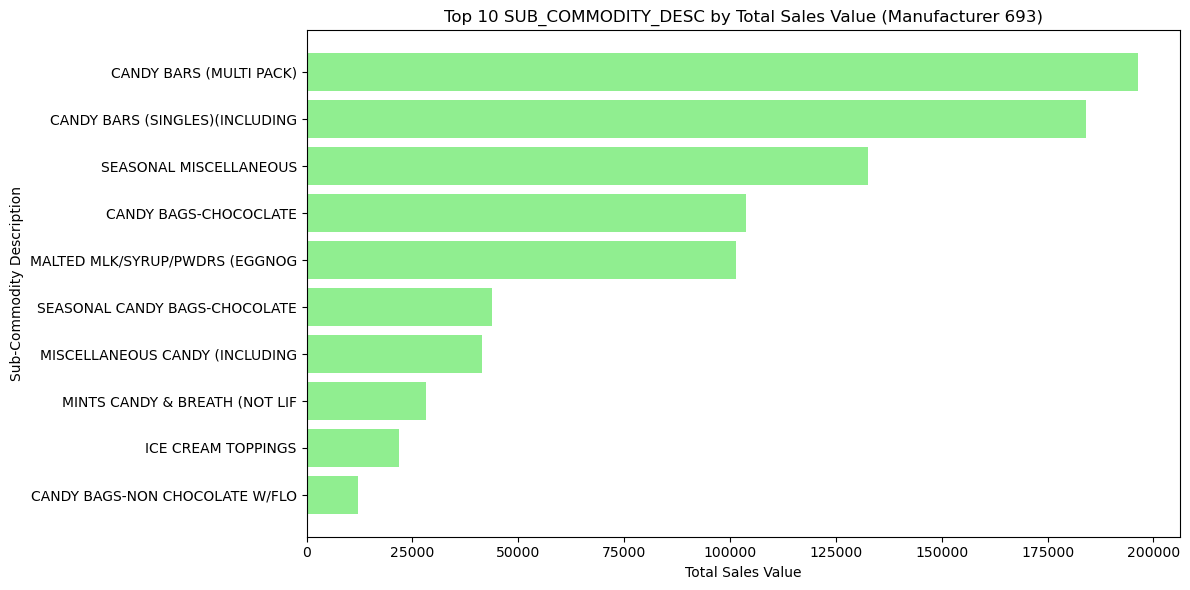

Top 10 COMMODITY_DESC:
                   COMMODITY_DESC      mean        sum   count
0                CANDY - PACKAGED  1.854196  545128.09  293997
1               CANDY - CHECKLANE  0.554420  207258.20  373829
2                     COCOA MIXES  2.018319  101567.85   50323
3                 SYRUPS/TOPPINGS  1.795187   21962.32   12234
4             COOKWARE & BAKEWARE  0.337005    7207.87   21388
5                    BAKING NEEDS  2.733541     571.31     209
6  CONVENIENT BRKFST/WHLSM SNACKS  2.678462     139.28      52
7            DIETARY AID PRODUCTS  1.413857      98.97      70
8          SPRING/SUMMER SEASONAL  7.950000      47.70       6
9             SPORTS MEMORABLILIA  0.404348      18.60      46

Top 10 SUB_COMMODITY_DESC:
               SUB_COMMODITY_DESC      mean        sum   count
0         CANDY BARS (MULTI PACK)  1.810515  196442.64  108501
1  CANDY BARS (SINGLES)(INCLUDING  0.491477  184098.13  374581
2          SEASONAL MISCELLANEOUS  2.562480  132657.01   51769
3   

In [212]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the original dataset
data = pd.read_csv(r"C:\Users\User\Desktop\fall courses\MGMT687 AI FOR BUSINESS DECISIONS\final project\revise\whole_clean.csv")

# Filter the target manufacturer
data_693 = data[data['MANUFACTURER'] == 693]

# Group by `COMMODITY_DESC` and calculate average sales, total sales, and count
commodity_analysis = (
    data_693.groupby('COMMODITY_DESC')['SALES_VALUE']
    .agg(['mean', 'sum', 'count'])   
    .sort_values(by='sum', ascending=False)  
    .reset_index()
)

# Group by `SUB_COMMODITY_DESC` and calculate average sales, total sales, and count
sub_commodity_analysis = (
    data_693.groupby('SUB_COMMODITY_DESC')['SALES_VALUE']
    .agg(['mean', 'sum', 'count'])  
    .sort_values(by='sum', ascending=False)  
    .reset_index()
)

# Visualize total sales for `COMMODITY_DESC`
plt.figure(figsize=(12, 6))
plt.barh(commodity_analysis['COMMODITY_DESC'][:10], commodity_analysis['sum'][:10], color='skyblue')
plt.xlabel('Total Sales Value')
plt.ylabel('Commodity Description')
plt.title('Top 10 COMMODITY_DESC by Total Sales Value (Manufacturer 693)')
plt.gca().invert_yaxis()  # 倒序顯示
plt.tight_layout()
plt.show()

# Visualize total sales for `SUB_COMMODITY_DESC
plt.figure(figsize=(12, 6))
plt.barh(sub_commodity_analysis['SUB_COMMODITY_DESC'][:10], sub_commodity_analysis['sum'][:10], color='lightgreen')
plt.xlabel('Total Sales Value')
plt.ylabel('Sub-Commodity Description')
plt.title('Top 10 SUB_COMMODITY_DESC by Total Sales Value (Manufacturer 693)')
plt.gca().invert_yaxis()  # 倒序顯示
plt.tight_layout()
plt.show()

# Output the top data tables
print("Top 10 COMMODITY_DESC:")
print(commodity_analysis.head(10))

print("\nTop 10 SUB_COMMODITY_DESC:")
print(sub_commodity_analysis.head(10))


## By analyzing the top 3 commodities, we found:
**1. Consistent demand:** Both brands having the same top-selling categories indicates widespread and consistent customer demand for packaged candy and checklane candy, not limited to just one brand.

**2. Strong competitiveness:** This consistency also highlights the inherent competitiveness and profit potential of these categories, making them reliable investments for driving sales growth.

## Business Recommendation
1. Packaged Candy and Checklane Candy are the top-performing categories for both brands, indicating consistent demand. Hence, we can double down on these top categories by expanding product variations to differentiate from 693.
2. Enhance visibility of these products in high-traffic areas, such as checkout counters.
3. Our top sub-category is Chocolate Candy Bags with Flour. This suggest we can maintain dominance in this sub-category through strong inventory and promotional efforts.
4. Candy bags(non chocolate) is a unique product for us, which 693 does not have an advantage in. We can introduce new flavors, healthier options, or fun shapes to expand product variety. Furthermore, Focus on families, children, and consumers who prefer non-chocolate options, emphasizing theproduct's uniqueness.